<a href="https://colab.research.google.com/github/jiruneko/decision_tree/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

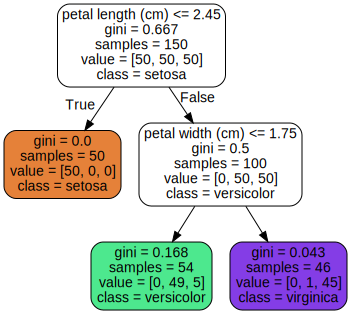

In [ ]:
from graphviz import Source
Source.from_file("iris_tree.dot")

In [ ]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

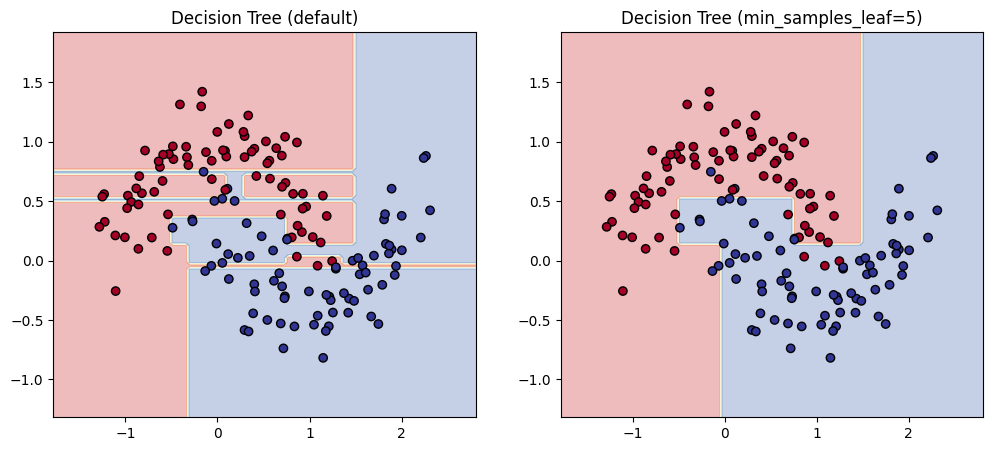

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

def plot_decision_boundary(clf, X, y, ax, title):
    x1s = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
    x2s = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    ax.contourf(x1, x2, y_pred, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    ax.set_title(title)

# プロット作成
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# tree_clf1 と tree_clf2 の分類境界をプロット
plot_decision_boundary(tree_clf1, X_moons, y_moons, ax1, "Decision Tree (default)")
plot_decision_boundary(tree_clf2, X_moons, y_moons, ax2, "Decision Tree (min_samples_leaf=5)")

plt.show()

In [ ]:
!pip install scikit-learn==0.24.2

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


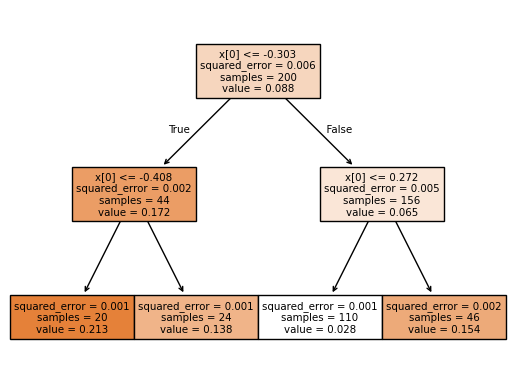

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)
plot_tree(tree_reg, filled=True)
plt.show()

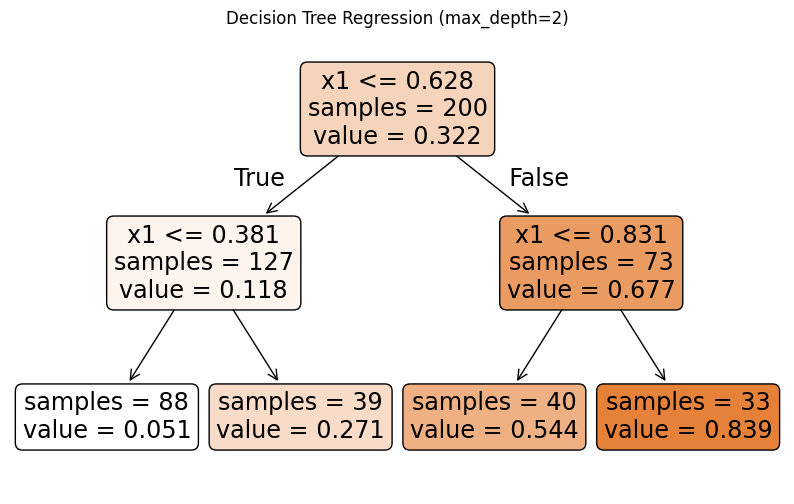

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# データセットの生成
np.random.seed(42)
X_quad = np.random.rand(200, 1)  # 0~1の範囲のデータを生成
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)  # 二次関数のデータにノイズを加える

# 決定木回帰のモデルを作成し、パラメータを調整
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

# 決定木の可視化
plt.figure(figsize=(10, 6))
plot_tree(tree_reg, feature_names=["x1"], filled=True, rounded=True, impurity=False)
plt.title("Decision Tree Regression (max_depth=2)")
plt.show()

In [ ]:
# 混合行列を算出
confusion_matrix(pred_y, test_y)

array([[24,  0,  0],
       [ 0, 20,  3],
       [ 0,  2, 26]])

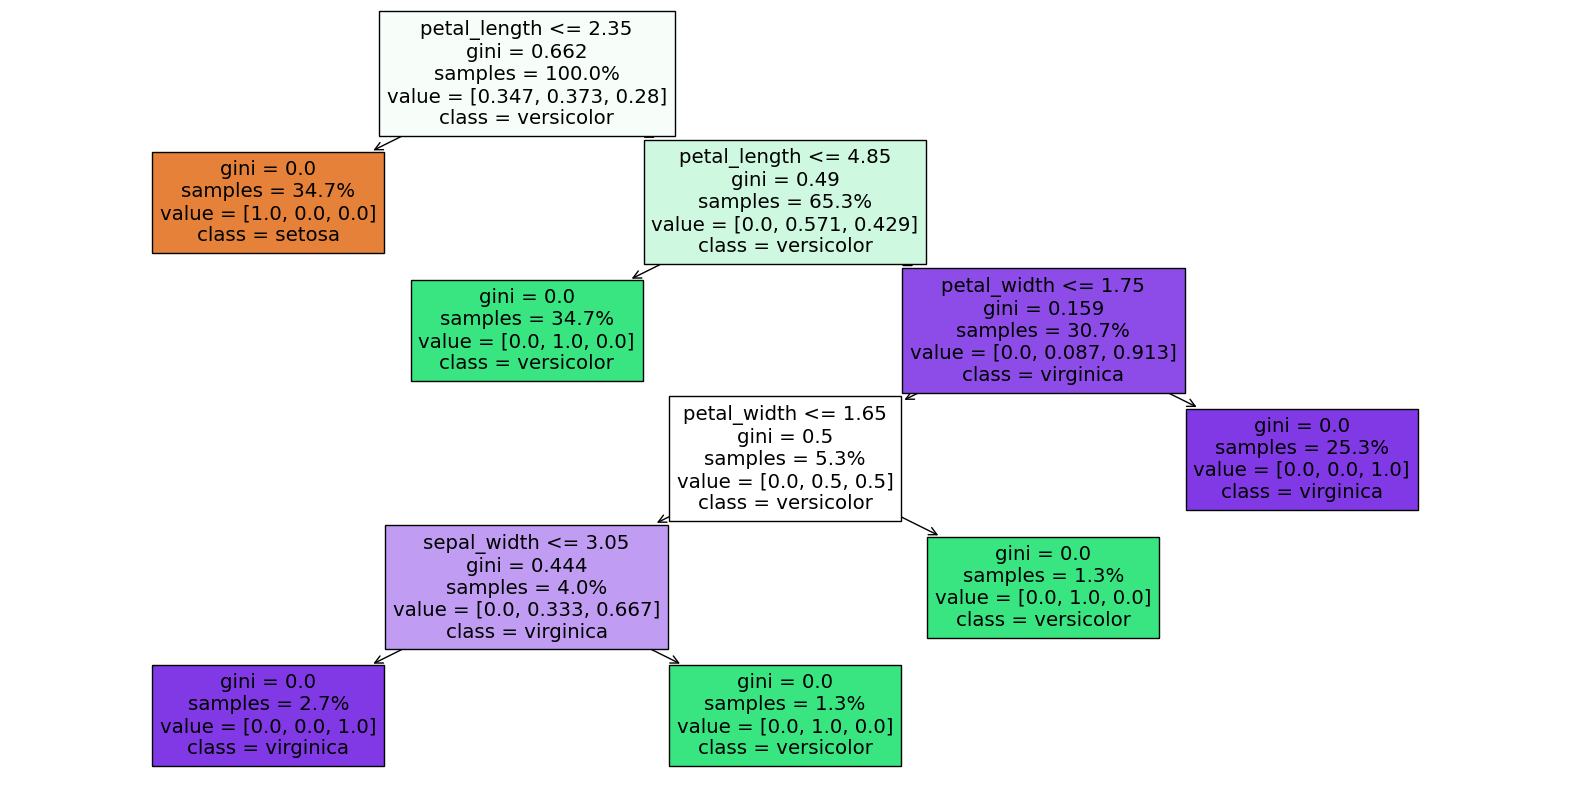

In [ ]:
## ツリーマップ
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=df_x.columns, filled=True, proportion=True, class_names=["setosa", "versicolor", "virginica"])
plt.show()

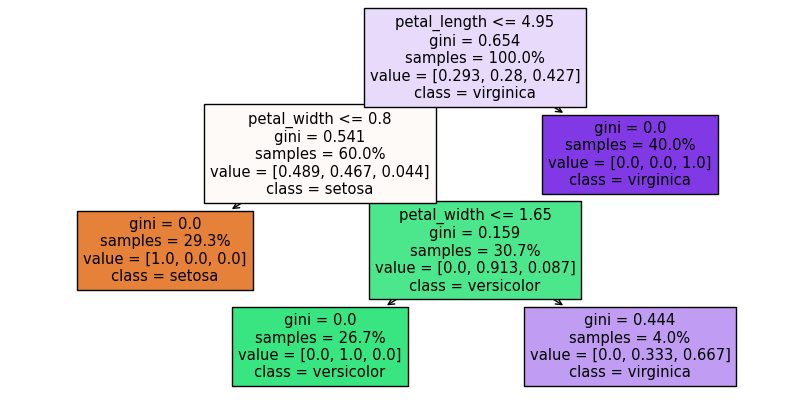

In [ ]:
# 説明変数と目的変数に分ける
df_x = df.drop('species', axis=1)
df_y = df['species']

#学習データをテストデータを分割
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.5)

#モデル学習
model = DecisionTreeClassifier(max_depth=3)
model.fit(train_x, train_y)

## ツリーマップ
plt.figure(figsize=(10,5))
plot_tree(model, feature_names=df_x.columns, filled=True, proportion=True, class_names=["setosa", "versicolor", "virginica"])
plt.show()